# I. Introduction

=======================================================================

**Walmart's Inventory Management and Demand Forecasting**

**Members :**

- Michael Nathaniel
- Nadia Nabila Shafira
- Noufal Rifata Reyhan
- Faris Arief Mawardi

**Objective :**

Membangun model forecasting penjualan yang akurat untuk berbagai toko Walmart dengan memanfaatkan faktor-faktor seperti tanggal, jenis toko, promosi, dan informasi lingkungan. Selain itu, hasil forecasting model tersebut akan digunakan untuk mengoptimalkan tingkat persediaan guna mencegah kelebihan atau kekurangan stok yang dapat mengganggu ketersediaan produk dan meningkatkan efisiensi operasional toko serta kepuasan pelanggan.

=======================================================================

**Latar Belakang :**

Walmart, salah satu ritel terbesar di dunia, beroperasi di berbagai lokasi dengan jenis dan ukuran toko yang berbeda. Pengetahuan tentang tren penjualan dan faktor-faktor yang memengaruhinya dapat membantu Walmart dalam mengoptimalkan persediaan, mencegah kelebihan atau kekurangan stok, serta meningkatkan efisiensi operasional dan kepuasan pelanggan. Manajemen persediaan merupakan aspek krusial dalam operasi ritel, seperti yang dialami oleh Walmart. Pengelolaan persediaan yang efisien memerlukan pemahaman mendalam tentang faktor-faktor yang memengaruhi penjualan dan penggunaan model peramalan yang akurat

**Problem Statement :**

- **Who:** Project ini dilakukan untuk memberikan insight terhadap Tim Manajemen Walmart yang bertanggung jawab atas supply chain dan penjualan.
- **What:** Masalah utama yang melatarbelakangi diangkatnya project ini adalah minimnya forecasting yang akurat terhadap penjualan di berbagai toko Walmart, sehingga mengakibatkan kesulitan dalam mengelola persediaan yang efisien.
- **Where:** Di seluruh toko Walmart yang beroperasi di berbagai lokasi dan memiliki berbagai tipe toko.
- **Why:** Ketidakmampuan untuk meramalkan penjualan dengan akurat dapat menyebabkan stok yang berlebihan (overstock) atau kekurangan stok (out-of-stock), yang berdampak pada ketersediaan produk dan mengakibatkan kerugian finansial.
- **How:** Dengan menerapkan forecasting model yang tepat dan memanfaatkannya untuk mengoptimalkan strategi manajemen persediaan, Walmart dapat meningkatkan efisiensi operasional dan meningkatkan kepuasan pelanggan.

**Kesimpulan Problem Statement:**

Minimnya akurasi forecasting penjualan di toko-toko Walmart mengakibatkan kesulitan dalam manajemen persediaan yang efisien dan dapat berdampak kepada potensi kerugian finansial. Salah satu langkah improvement yang bisa diambil sebagai solusi adalah penerapan forecasting model yang tepat untuk meningkatkan efisiensi operasional dan kepuasan pelanggan.

**Project Workflow**

1. **Pengumpulan Data:**
   - Mengumpulkan data historis penjualan mingguan dari berbagai toko Walmart.
   - Pengumpulan data terkait jenis toko, informasi lingkungan (seperti data cuaca), harga bahan bakar, data promosi, Consumer Price Index (CPI), tingkat pengangguran, dan faktor-faktor lain yang relevan.

2. **Eksplorasi dan Pemahaman Data (EDA):**
   - Menjalankan analisis eksplorasi data untuk memahami pola, tren, dan korelasi antara variabel-variabel yang ada.
   - Melakukan visualisasi data untuk mendapatkan wawasan awal tentang hubungan antara variabel, seperti grafik waktu untuk penjualan, korelasi antara faktor-faktor tertentu dengan penjualan, dan lainnya.

3. **Pembersihan dan Preprocessing Data:**
   - Mengidentifikasi dan menangani nilai-nilai yang hilang atau tidak valid.
   - Melakukan encoding pada data kategorikal.
   - Normalisasi atau penskalaan data jika diperlukan.

4. **Pembuatan Model:**
   - Memilih model peramalan yang sesuai, seperti Time Series (misalnya ARIMA, SARIMA, atau Prophet), regresi, atau machine learning seperti Random Forest, XGBoost, atau LSTM Neural Networks.
   - Melakukan pemisahan data menjadi data pelatihan (training) dan data pengujian (testing).
   - Melatih model pada data pelatihan dan mengevaluasi kinerjanya menggunakan metrik yang relevan (RMSE, MAE, MAPE, dll.) pada data pengujian.

5. **Validasi dan Penyesuaian Model:**
   - Melakukan validasi silang (cross-validation) atau pengujian ulang terhadap model untuk mengevaluasi kembali kinerja dan keakuratannya.
   - Menyesuaikan hyperparameter model jika diperlukan untuk meningkatkan kinerja model.

6. **Implementasi Model dan Optimisasi Persediaan:**
   - Menerapkan model forecasting yang terbaik untuk memprediksi penjualan masa depan.
   - Menggunakan hasil forecasting untuk mengoptimalkan strategi manajemen persediaan, memastikan ketersediaan produk yang tepat pada waktu yang tepat dan di tempat yang tepat.

7. **Pemantauan dan Evaluasi:**
   - Memantau kinerja model secara berkala.
   - Mengevaluasi dampak dari penggunaan model pada manajemen persediaan dan penjualan sebenarnya.
   - Melakukan penyesuaian jika diperlukan untuk meningkatkan akurasi atau kinerja model.

8. **Dokumentasi dan Komunikasi Hasil:**
   - Mendokumentasikan langkah-langkah yang diambil, model yang digunakan, dan hasil evaluasi.
   - Berkomunikasi hasil dan rekomendasi kepada tim manajemen Walmart atau pihak yang berkepentingan lainnya.

---

# II. Import Libraries

In [48]:
import pandas as pd # Import library Pandas untuk processing data
from scipy.stats import skew, kurtosis # Import Skew dan kurtosis dari scipy stats untuk analisis skewness dan kurtosis
import numpy as np # Import library NumPy untuk komputasi numerik

# Import library Matplotlib, Seaborn dan PrettyTable dari prettytable untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable

# Import filter warnings
import warnings
warnings.filterwarnings('ignore')

import phik #importing phik untuk analisis korelasi yang bertipe data object/kategorikal
from phik import phik_matrix #untuk menghitung matriks korelasi Phi K 
from phik.report import plot_correlation_matrix #untuk membuat visualisasi matriks korelasi.
from phik import report #untuk menyediakan pelaporan dan analisis tambahan untuk menjelajahi hubungan antara variabel dalam dataset yang bersifat kategorikal.


# Feature Engineering
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, MinMaxScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

# Data Modeling
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

---

# III. Data Loading

**3.1 Data Loading Dataset Features**

In [2]:
features = pd.read_csv('features.csv')

**3.2 Data Loading Dataset Stores**

In [3]:
stores = pd.read_csv('stores.csv')

**3.3 Data Loading Dataset Train**

In [4]:
train = pd.read_csv('train.csv')

---

# IV. Exploratory Data Analysis 

**4.1 Pemahaman Awal Dataset**

**4.1.1 Dataset Features**

In [5]:
features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


**Insight :**

Tabel di atas merupakan data yang berisi informasi tentang penjualan di berbagai toko dari suatu perusahaan, dengan beberapa kolom yang berbeda yang menyediakan detail tentang setiap transaksi. Berikut adalah penjelasan singkat tentang setiap kolom:

1. **Store**: Nomor identifikasi toko tempat transaksi dilakukan.
2. **Date**: Tanggal transaksi terjadi.
3. **Temperature**: Suhu pada hari transaksi diukur.
4. **Fuel_Price**: Harga bahan bakar pada hari transaksi.
5. **MarkDown1-5**: Sejumlah kolom yang mungkin menunjukkan markdown sales atau potongan harga yang diberikan pada hari tertentu untuk mendorong penjualan.
6. **CPI (Consumer Price Index)**: Sebuah ukuran statistik yang mengukur perubahan rata-rata harga sekelompok barang dan jasa yang sering dibeli oleh konsumen dalam suatu ekonomi pada periode waktu tertentu. CPI digunakan untuk memahami tingkat inflasi atau deflasi yang mempengaruhi biaya hidup masyarakat.
7. **Unemployment**: Tingkat pengangguran pada waktu tertentu.
8. **IsHoliday**: Menunjukkan apakah transaksi dilakukan pada hari libur atau tidak.

Setiap baris dalam tabel ini mewakili satu transaksi di salah satu toko. Data ini dapat digunakan untuk menganalisis hubungan antara faktor-faktor seperti cuaca, harga bahan bakar, diskon, atau indikator makroekonomi dengan penjualan ritel. Analisis semacam ini dapat membantu dalam memahami pola penjualan, menentukan faktor-faktor apa yang mempengaruhi penjualan, dan mengoptimalkan strategi pemasaran atau manajemen persediaan untuk meningkatkan kinerja penjualan.

**4.1.2 Dataset Stores**

In [6]:
stores

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


**Insight :**

Tabel yang diberikan memiliki tiga kolom: "Store", "Type", dan "Size".

1. **Store:** Kolom ini berisi nomor identifikasi untuk setiap toko dalam dataset.
2. **Type:** Kolom ini menggambarkan tipe atau klasifikasi dari setiap toko. Terdapat tiga tipe: A, B, dan C, yang mungkin mengindikasikan kategori atau segmentasi dari toko-toko tersebut.
3. **Size:** Kolom ini berisi informasi tentang ukuran (luas) dari masing-masing toko, mungkin dalam satuan tertentu yang tidak dijelaskan dalam data ini.

**Insight dan Penjelasan:**
- Kolom "Store" digunakan untuk mengidentifikasi setiap toko secara unik dalam dataset.
- Kolom "Type" memberikan informasi tentang kategori atau segmentasi dari setiap toko, yang mungkin mengindikasikan perbedaan karakteristik atau strategi bisnis yang diterapkan oleh masing-masing tipe toko.
- Kolom "Size" memberikan informasi tentang luas atau ukuran dari setiap toko, yang dapat menjadi faktor penting dalam strategi pemasaran, distribusi produk, dan pengelolaan inventaris.

Ketiga kolom ini merupakan informasi penting dalam analisis data penjualan tiap store karena dapat membantu dalam pemahaman tentang perbedaan antara toko-toko, pengelompokan berdasarkan karakteristik tertentu, dan pengambilan keputusan yang berkaitan dengan strategi bisnis dan manajemen toko.

**4.1.3 Dataset Train**

In [7]:
train

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


**Insight :**

Data yang diberikan terdiri dari informasi penjualan mingguan di beberapa toko (store) pada departemen tertentu (dept) pada tanggal-tanggal tertentu. Berikut adalah insight dari data tersebut:

1. **Store (Toko):** Data mencakup beberapa toko yang berbeda. Setiap toko memiliki identifikasi unik.
2. **Dept (Departemen):** Data juga mencakup departemen yang berbeda di setiap toko. Masing-masing departemen memiliki identifikasi unik.
3. **Date (Tanggal):** Menunjukkan tanggal penjualan mingguan. Rentang tanggal dimulai dari 2010-02-05 hingga 2012-10-26.
4. **Weekly_Sales (Penjualan Mingguan):** Merupakan nilai penjualan mingguan pada toko dan departemen tertentu pada tanggal tertentu.
5. **IsHoliday (Apakah Hari Libur):** Kolom ini menandai apakah minggu tersebut termasuk dalam periode libur (True) atau tidak (False).

Dengan data ini, analisis dapat dilakukan untuk memahami tren penjualan mingguan, dampak hari libur terhadap penjualan, perbandingan kinerja penjualan antar toko dan departemen, serta pola penjualan sepanjang waktu untuk mengidentifikasi faktor-faktor yang memengaruhi penjualan.

**Pemahaman Umum Raw Dataset**

Berdasarkan informasi dari ketiga dataset yang diberikan, kita dapat membuat beberapa kesimpulan awal:

**Dataset Features :**
1. **Data Penjualan dan Faktor-faktor Terkait:**
   - Menyediakan informasi tentang penjualan mingguan di berbagai toko dengan berbagai faktor yang memengaruhinya.
   - Faktor seperti suhu, harga bahan bakar, potongan harga (markdown), CPI, tingkat pengangguran, dan apakah hari tersebut merupakan hari libur atau tidak dicatat.
   - Dataset ini dapat membantu dalam analisis tren penjualan, hubungan antara faktor eksternal dan penjualan, serta perbandingan kinerja penjualan pada periode libur dan non-libur.

**Dataset Stores :**
1. **Informasi Store (Toko):**
   - Mengandung informasi tentang nomor identifikasi, tipe, dan ukuran toko.
   - Variabel "Type" menggambarkan klasifikasi toko dalam tiga kategori: A, B, dan C.
   - Variabel "Size" memberikan informasi tentang luas atau ukuran masing-masing toko.
   - Berguna untuk mengelompokkan toko berdasarkan karakteristik dan ukurannya, serta memahami perbedaan strategi bisnis antar tipe toko.

**Dataset Train :**
1. **Data Penjualan Mingguan per Toko dan Departemen:**
   - Menyajikan informasi tentang penjualan mingguan di berbagai toko dan departemen pada tanggal-tanggal tertentu.
   - Setiap baris mewakili satu transaksi dengan informasi tentang toko, departemen, tanggal, dan nilai penjualan mingguan.
   - Dapat digunakan untuk menganalisis tren penjualan, dampak hari libur terhadap penjualan, serta kinerja penjualan antar toko dan departemen.

**Kesimpulan Awal :**
1. Data pada keseluruhan dataset menyediakan informasi yang penting dan beragam mengenai penjualan ritel, faktor eksternal yang memengaruhi penjualan, karakteristik toko, dan tren penjualan per departemen.
2. Analisis lebih lanjut dapat dilakukan untuk memahami hubungan antara faktor-faktor seperti cuaca, harga bahan bakar, diskon, dan indikator ekonomi dengan penjualan.
3. Informasi tentang toko (tipe, ukuran) dapat membantu dalam pemahaman perbedaan antara toko-toko, segmentasi, dan pengambilan keputusan terkait strategi bisnis.
   
Analisis lebih lanjut, pemrosesan data yang tepat, dan teknik analisis statistik dapat memberikan wawasan yang lebih dalam terkait tren penjualan, faktor yang memengaruhi penjualan, serta strategi yang dapat diterapkan untuk meningkatkan kinerja penjualan.

Dari informasi awal ini, akan dibentuk dataset gabungan yang akan mengambil informasi penting, seperti :

- dept
- weekly_sales
- type
- size

Informasi penting tersebut akan digabungkan ke dalam dataset features.

**4.2 Compiling Datas**

Pada section ini, data-data yang dibutuhkan untuk menjalankan project ini akan digabungkan menjadi suatu dataframe yang akan digunakan dalam pembangunan forecasting model.

In [14]:
print(f'kolom pada data features:', features.columns)
print('-'*120)
print(f'kolom pada data stores:', stores.columns)
print('-'*120)
print(f'kolom pada data train:', train.columns)

kolom pada data features: Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')
------------------------------------------------------------------------------------------------------------------------
kolom pada data stores: Index(['Store', 'Type', 'Size'], dtype='object')
------------------------------------------------------------------------------------------------------------------------
kolom pada data train: Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')


In [15]:
# Menggabungkan informasi dari dataframe features dan stores berdasarkan kolom Store
merged_data = pd.merge(features[['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday']],
                       stores[['Store', 'Type', 'Size']],
                       on='Store',
                       how='left')  # Gunakan 'left' join untuk mempertahankan jumlah baris dari features

# Menggabungkan informasi dari dataframe train ke dalam dataframe yang sudah digabungkan sebelumnya
final_data = pd.merge(merged_data, train[['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday']],
                      on=['Store', 'Date', 'IsHoliday'],  # Gabungkan berdasarkan kolom Store, Date, dan IsHoliday
                      how='left')  # Gunakan 'left' join untuk mempertahankan jumlah baris dari features

# Menampilkan dataframe hasil penggabungan
final_data  

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,1.0,24924.50
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,2.0,50605.27
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,3.0,13740.12
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,4.0,39954.04
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,5.0,32229.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423320,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,B,118221,NaN,NaN
423321,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,B,118221,NaN,NaN
423322,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,B,118221,NaN,NaN
423323,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,B,118221,NaN,NaN


In [16]:
data = final_data.copy()
data

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,1.0,24924.50
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,2.0,50605.27
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,3.0,13740.12
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,4.0,39954.04
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,5.0,32229.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423320,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,B,118221,NaN,NaN
423321,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,B,118221,NaN,NaN
423322,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,B,118221,NaN,NaN
423323,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,B,118221,NaN,NaN


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423325 entries, 0 to 423324
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         423325 non-null  int64  
 1   Date          423325 non-null  object 
 2   Temperature   423325 non-null  float64
 3   Fuel_Price    423325 non-null  float64
 4   MarkDown1     152433 non-null  float64
 5   MarkDown2     112532 non-null  float64
 6   MarkDown3     138658 non-null  float64
 7   MarkDown4     136466 non-null  float64
 8   MarkDown5     153187 non-null  float64
 9   CPI           422740 non-null  float64
 10  Unemployment  422740 non-null  float64
 11  IsHoliday     423325 non-null  bool   
 12  Type          423325 non-null  object 
 13  Size          423325 non-null  int64  
 14  Dept          421570 non-null  float64
 15  Weekly_Sales  421570 non-null  float64
dtypes: bool(1), float64(11), int64(2), object(2)
memory usage: 52.1+ MB


**4.3 Pengecekan Duplicate Entries**

Pada section ini, akan dilakukan pengecekan duplicate entries yang terdapat pada dataset ini.

In [18]:
# Menghitung jumlah baris yang merupakan duplikat
jumlah_duplikat = data.duplicated().sum()

print(f"Jumlah baris duplikat: {jumlah_duplikat}")

Jumlah baris duplikat: 0


**Insight :**

Tidak ada duplicate entries pada dataset. Selanjutnya, kita akan melakukan pengecekan missing values pada dataset

**4.4 Analisis Missing Values**

**4.4.1 Identifikasi Missing Values**

In [19]:
missing = data.isnull().sum() # Menginisiasi variable missing untuk melakukan penghitungan jumlah missing values pada dataset
missing_percentage = (data.isnull().sum() / len(data)) * 100 # Menginisiasi persentase missing values pada dataset
info_missing = pd.DataFrame({'Jumlah Missing Value':missing,'Persentase Missing Value':missing_percentage}) # Menginisiasi variable untuk menampilkan jumlah missing values beserta persentasenya per fitur dalam dataset
info_missing # Menampilkan hasil perhitungan missing values dalam bentuk dataframe

,Jumlah Missing Value,Persentase Missing Value
Store,0,0.000000
Date,0,0.000000
Temperature,0,0.000000
Fuel_Price,0,0.000000
MarkDown1,270892,63.991496
MarkDown2,310793,73.417115
MarkDown3,284667,67.245497
MarkDown4,286859,67.763302
MarkDown5,270138,63.813382
CPI,585,0.138192


**4.4.2 Menampilkan Baris Missing Values pada MarkDown**

In [20]:
# Menampilkan baris yang mengandung missing values pada kolom MarkDown1
sample_missing_values = data[data['MarkDown1'].isnull()].sample(100)
sample_missing_values_sorted = sample_missing_values.sort_values(by='Date', ascending=True)
sample_missing_values_sorted

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales
382573,41,2010-02-05,30.27,2.580,NaN,NaN,NaN,NaN,NaN,189.381697,7.541,False,A,196321,48.0,500.00
128622,14,2010-02-05,27.31,2.784,NaN,NaN,NaN,NaN,NaN,181.871190,8.992,False,A,200898,38.0,129530.62
108382,12,2010-02-05,49.47,2.962,NaN,NaN,NaN,NaN,NaN,126.442065,13.975,False,B,112238,71.0,13024.98
372615,40,2010-02-19,27.84,2.747,NaN,NaN,NaN,NaN,NaN,131.637000,5.892,False,A,155083,1.0,23172.75
148783,16,2010-02-19,21.13,2.550,NaN,NaN,NaN,NaN,NaN,189.534100,7.039,False,B,57197,59.0,243.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345353,36,2011-09-30,81.52,3.328,NaN,NaN,NaN,NaN,NaN,215.453226,8.177,False,A,39910,1.0,1757.97
144636,15,2011-09-30,64.87,3.858,NaN,NaN,NaN,NaN,NaN,136.419500,7.806,False,B,123737,28.0,705.15
144806,15,2011-10-14,61.30,3.744,NaN,NaN,NaN,NaN,NaN,136.515097,7.866,False,B,123737,83.0,228.70
16698,2,2011-10-21,64.53,3.353,NaN,NaN,NaN,NaN,NaN,217.165004,7.441,False,A,202307,74.0,14322.44


**4.4.3 Menampilkan Baris Missing Values pada CPI**

In [21]:
# Menampilkan baris yang mengandung missing values pada kolom MarkDown1
sample_missing_values = data[data['CPI'].isnull()].sample(100)
sample_missing_values_sorted = sample_missing_values.sort_values(by='Date', ascending=True)
sample_missing_values_sorted

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales
406428,43,2013-05-03,70.45,3.386,80.07,NaN,49.53,NaN,549.26,NaN,NaN,False,C,41062,NaN,NaN
69022,7,2013-05-03,42.36,3.573,4661.74,NaN,25.74,1145.37,917.91,NaN,NaN,False,B,70713,NaN,NaN
305042,31,2013-05-03,65.51,3.386,4148.59,12.00,91.61,3630.99,7210.37,NaN,NaN,False,A,203750,NaN,NaN
198316,20,2013-05-03,60.12,3.592,17552.85,17.00,89.63,7674.41,1826.70,NaN,NaN,False,A,203742,NaN,NaN
148593,15,2013-05-03,58.11,3.775,4421.68,46.00,82.63,1683.90,700.46,NaN,NaN,False,B,123737,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257767,26,2013-07-19,70.09,3.803,1635.20,1021.13,143.75,490.21,1123.83,NaN,NaN,False,A,152513,NaN,NaN
294872,30,2013-07-19,79.15,3.556,189.49,NaN,5.10,NaN,664.65,NaN,NaN,False,C,42988,NaN,NaN
372475,39,2013-07-26,83.84,3.620,12682.46,1094.97,21.85,170.61,2779.41,NaN,NaN,False,A,184109,NaN,NaN
20559,2,2013-07-26,83.17,3.620,1966.46,609.55,91.00,493.60,2416.20,NaN,NaN,False,A,202307,NaN,NaN


**4.4.4 Menampilkan Baris Missing Values pada Dept**

In [22]:
# Menampilkan baris yang mengandung missing values pada kolom MarkDown1
sample_missing_values = data[data['Dept'].isnull()].sample(100)
sample_missing_values_sorted = sample_missing_values.sort_values(by='Date', ascending=True)
sample_missing_values_sorted

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales
423286,45,2012-11-02,52.45,3.787,11069.00,6937.91,47.57,7926.20,1362.22,192.286944,8.667,False,B,118221,NaN,NaN
167952,17,2012-11-02,42.44,3.702,7478.97,8749.51,17.92,2157.65,851.55,131.236226,5.527,False,B,93188,NaN,NaN
108291,11,2012-11-02,62.23,3.386,17795.33,6233.15,44.62,12979.82,3359.51,227.005883,6.034,False,A,207499,NaN,NaN
59195,6,2012-11-02,58.38,3.386,13494.41,15350.17,34.79,5549.32,6682.40,225.087150,5.329,False,A,202505,NaN,NaN
39909,4,2012-11-16,49.86,3.271,14400.63,409.67,205.09,1497.33,7862.40,131.325800,3.879,False,A,205863,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59231,6,2013-07-12,85.91,3.400,13456.91,1783.40,114.92,1133.32,6330.81,NaN,NaN,False,A,202505,NaN,NaN
217674,22,2013-07-12,77.78,3.645,3289.92,1101.45,27.70,1801.70,1244.52,NaN,NaN,False,B,119557,NaN,NaN
78968,8,2013-07-26,78.70,3.620,675.56,740.04,55.38,73.42,2343.11,NaN,NaN,False,A,155078,NaN,NaN
294873,30,2013-07-26,85.00,3.620,35.08,NaN,0.50,NaN,525.63,NaN,NaN,False,C,42988,NaN,NaN


**Insight:**

1. **Missing Values:**
   - Variabel "MarkDown1" hingga "MarkDown5" memiliki lebih dari 50% missing values, sementara variabel "CPI" dan "Unemployment" memiliki sekitar 0.13% missing values. Adapun variabel "Dept" dan "Weekly_Sales", keduanya memiliki sekitar 0.41% missing values.
   - Kurangnya data pada markdown pricing terjadi sebelum November 2011, menjelaskan keberadaan missing values pada periode sebelumnya. Oleh karena itu, penghapusan missing values pada markdown sebelum November 2011 menjadi keputusan krusial.

2. **Keterkaitan antara "CPI" dengan "Unemployment" dan "Dept" dengan "Weekly_Sales":**
   - Adanya pola missing values yang selalu berpasangan pada dua pasangan variabel ini menunjukkan hubungan yang erat dalam proses pengumpulan data. Hal ini kemungkinan berasal dari sumber yang sama atau kondisi serupa pada saat pengambilan data.

Keputusan untuk menghapus missing values pada kolom tertentu didasarkan pada ketersediaan data markdown yang baru hanya setelah November 2011. Kehadiran missing values yang tinggi pada markdown sebelum periode ini, bersama dengan pola missing values yang saling berhubungan antara "CPI" dan "Unemployment", serta "Dept" dan "Weekly_Sales", mendorong keputusan untuk melakukan penghapusan secara selektif.

Langkah ini diambil untuk memastikan analisis yang lebih akurat dan model yang lebih handal, menghindari penggunaan informasi yang tidak lengkap. Dengan menghapus missing values pada kolom tertentu, diharapkan model dapat memanfaatkan data yang representatif dan relevan bagi periode yang diinginkan.

**4.4.5 Drop Missing Values**

In [23]:
data_ = data.dropna()
data_

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales
6587,1,2011-11-11,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,A,151315,1.0,18689.54
6588,1,2011-11-11,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,A,151315,2.0,44936.47
6589,1,2011-11-11,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,A,151315,3.0,9959.64
6590,1,2011-11-11,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,A,151315,4.0,36826.52
6591,1,2011-11-11,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,A,151315,5.0,31002.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423281,45,2012-10-26,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,False,B,118221,93.0,2487.80
423282,45,2012-10-26,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,False,B,118221,94.0,5203.31
423283,45,2012-10-26,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,False,B,118221,95.0,56017.47
423284,45,2012-10-26,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,False,B,118221,97.0,6817.48


**Insight :**

Missing Values telah berhasil didrop 

**4.5 Analisis Distribusi Data**

In [24]:
data_.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,97056.0,20.239408,12.037946,1.00000,10.000000,20.000000,29.000000,45.000000
Temperature,97056.0,57.348331,18.263734,7.46000,42.750000,57.950000,72.660000,95.910000
Fuel_Price,97056.0,3.618946,0.280003,3.03100,3.413000,3.630000,3.820000,4.301000
MarkDown1,97056.0,8841.260245,9258.091154,32.50000,3600.790000,6264.180000,10333.240000,88646.760000
MarkDown2,97056.0,3693.532392,10058.901796,-265.76000,47.550000,192.000000,2551.320000,104519.540000
MarkDown3,97056.0,1816.629491,10989.284083,-29.10000,5.400000,30.460000,123.420000,141630.610000
MarkDown4,97056.0,4025.923108,7173.060535,0.46000,605.880000,1739.830000,4082.990000,67474.850000
MarkDown5,97056.0,5310.830581,6535.397883,170.64000,2383.670000,3864.600000,6197.530000,108519.280000
CPI,97056.0,174.766754,39.652638,129.81671,136.856419,189.194056,219.355063,227.036936
Unemployment,97056.0,7.414578,1.708319,4.07700,6.392000,7.280000,8.256000,12.890000


**Insight :**

1. **Temperature:**
   - Rata-rata suhu yang tercatat sebesar 57.35°F dengan deviasi standar sebesar 18.26°F. Suhu berkisar antara 7.46°F hingga 95.91°F.
2. **Fuel_Price:**
   - Rata-rata harga bahan bakar adalah 3.62 dengan deviasi standar sebesar 0.28. Rentang harga bahan bakar dari 3.03 hingga 4.30.
3. **MarkDown1 - MarkDown5:**
   - Nilai rata-rata dan deviasi standar dari MarkDown1 hingga MarkDown5 cukup tinggi, menunjukkan variasi yang signifikan dalam data. Rentang nilai sangat besar untuk setiap jenis MarkDown.
4. **CPI (Consumer Price Index):**
   - Rata-rata CPI adalah 174.77 dengan deviasi standar sebesar 39.65. Rentang CPI berkisar antara 129.82 hingga 227.04.
5. **Unemployment:**
   - Rata-rata tingkat pengangguran adalah 7.41% dengan deviasi standar sebesar 1.71%. Tingkat pengangguran berkisar dari 4.08% hingga 12.89%.
6. **Size:**
   - Rata-rata ukuran toko adalah 155,229 dengan deviasi standar sebesar 51,201. Rentang ukuran toko dari 34,875 hingga 219,622.
7. **Dept (Departments):**
   - Rata-rata jumlah departemen dalam suatu toko adalah 44.28 dengan deviasi standar sebesar 30.12. Data rentang dari 1 hingga 99 departemen.
8. **Weekly_Sales:**
   - Rata-rata penjualan mingguan adalah 17,857 dengan deviasi standar sebesar 24,732. Rentang penjualan mingguan dari -1,699 hingga 630,999.

Data menunjukkan variasi yang signifikan di antara variabel-variabel tersebut dengan nilai yang bervariasi dari setiap fitur. Hal ini menggambarkan perbedaan skala dan rentang yang harus dipertimbangkan dalam analisis serta pemodelan. Perlu dilakukan normalisasi atau penyesuaian skala untuk beberapa variabel yang memiliki rentang nilai yang sangat besar agar dapat digunakan secara efektif dalam pemodelan.

In [25]:
# Filter column yang akan dianalisis -> numerical features 
numeric_features = data_.select_dtypes(include=np.number)
# Menghitung skewness dan kurtosis dari kolom numerik
skewness = numeric_features.skew()
kurtosis = numeric_features.kurtosis()

# Membuat DataFrame 'summary' yang berisi nilai skewness dan kurtosis untuk setiap kolom numerik
skewkurt = pd.DataFrame({'Skewness': skewness, 'Kurtosis': kurtosis})

skewkurt

,Skewness,Kurtosis
Store,0.234642,-0.902426
Temperature,-0.118864,-0.918870
Fuel_Price,0.004420,-0.589169
MarkDown1,3.212952,14.892338
MarkDown2,5.103532,32.883661
MarkDown3,7.484381,60.979236
MarkDown4,4.263339,22.516157
MarkDown5,7.814230,95.952109
CPI,0.076962,-1.831023
Unemployment,0.609964,1.213364


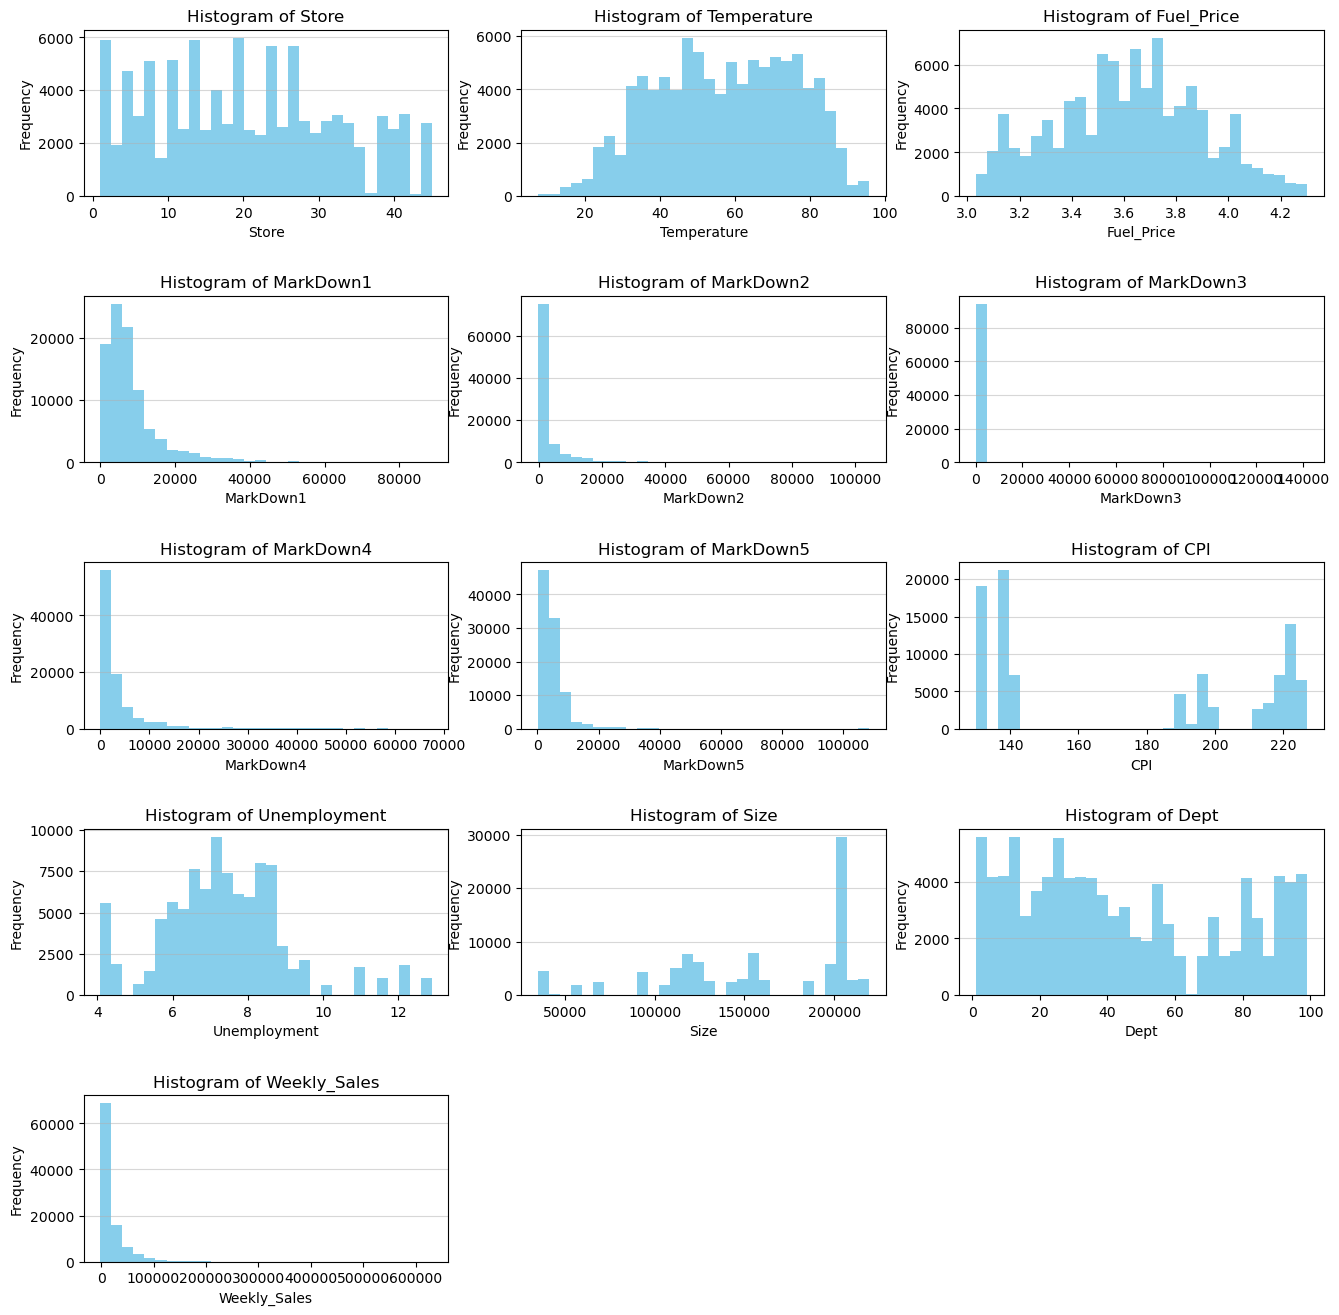

In [26]:
# Membuat subplots histogram dari masing-masing kolom numerik
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(16, 16))
fig.subplots_adjust(hspace=0.6)

axes = axes.flatten()

# Melakukan iterasi untuk setiap kolom pada DataFrame skewkurt
for i, column in enumerate(skewkurt.index):
    ax = axes[i]
    ax.hist(data_[column], bins=30, color='skyblue')
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.grid(axis='y', alpha=0.5)

for i in range(len(skewkurt.index), len(axes)):
    fig.delaxes(axes[i])

plt.show()

**Insight :**

1. **Store:** Sebagai variabel kategoris atau pengidentifikasi unik, tidak memiliki distribusi numerik yang bisa diinterpretasikan melalui histogram. Variabel ini hanya mewakili toko-toko yang berbeda.
2. **Temperature:** Distribusi data tampak cukup simetris dengan skewness yang sedikit negatif. Hal ini menunjukkan bahwa data memiliki kecenderungan untuk condong ke kiri, yang berarti distribusinya sedikit lebih condong ke suhu yang lebih rendah. Tidak ada indikasi kuat untuk adanya ekor ekstrim pada distribusi suhu.
3. **Fuel_Price:** Distribusi data tampak cukup simetris dengan skewness yang mendekati nol. Distribusi data cenderung normal, namun bisa memiliki sedikit ekor ke kanan, menunjukkan sedikit kecenderungan kenaikan pada harga bahan bakar.
4. **MarkDown1 - MarkDown5:** Variabel-variabel ini memiliki skewness yang tinggi (positif) dan kurtosis yang sangat tinggi, menunjukkan bahwa distribusi data memiliki ekor yang sangat panjang di sebelah kanan. Ini menandakan adanya nilai-nilai yang sangat tinggi (outliers) pada kolom-kolom ini.
5. **CPI (Consumer Price Index):** Distribusi data tampak cukup simetris dengan skewness yang mendekati nol. Data memiliki sedikit kecenderungan condong ke kanan, namun tidak terlalu signifikan.
6. **Unemployment:** Distribusi data memiliki skewness yang sedikit positif, menunjukkan kecenderungan untuk sedikit condong ke kanan. Namun, tidak terlalu signifikan dan tidak menunjukkan adanya ekor ekstrim pada distribusi data.
7. **Size:** Distribusi data memiliki skewness negatif, menunjukkan kecenderungan condong ke kiri, tetapi tidak terlalu signifikan. Tidak ada indikasi kuat akan adanya ekor ekstrim pada distribusi ukuran toko ini.
8. **Dept:** Distribusi data memiliki skewness positif yang moderat. Data condong ke kanan, menunjukkan kecenderungan untuk memiliki nilai yang lebih tinggi, namun tidak menunjukkan ekor ekstrim yang signifikan.
9. **Weekly_Sales:** Distribusi data memiliki skewness yang tinggi (positif) dan kurtosis yang sangat tinggi, menunjukkan bahwa distribusi data memiliki ekor yang sangat panjang di sebelah kanan. Ini menandakan adanya nilai-nilai yang sangat tinggi (outliers) pada kolom penjualan mingguan ini.

Kesimpulannya, sebagian besar variabel menunjukkan adanya distribusi yang tidak simetris dengan beberapa variabel menunjukkan kecenderungan memiliki ekor yang lebih panjang di ekstrim kanan (positif). Hal ini penting untuk dipertimbangkan dalam analisis lebih lanjut serta pemodelan statistik atau machine learning, terutama dalam penanganan outliers dan penyesuaian distribusi data yang diperlukan untuk mendapatkan hasil yang lebih akurat dan representatif.

**4.6 Analisis Identifikasi Outliers**

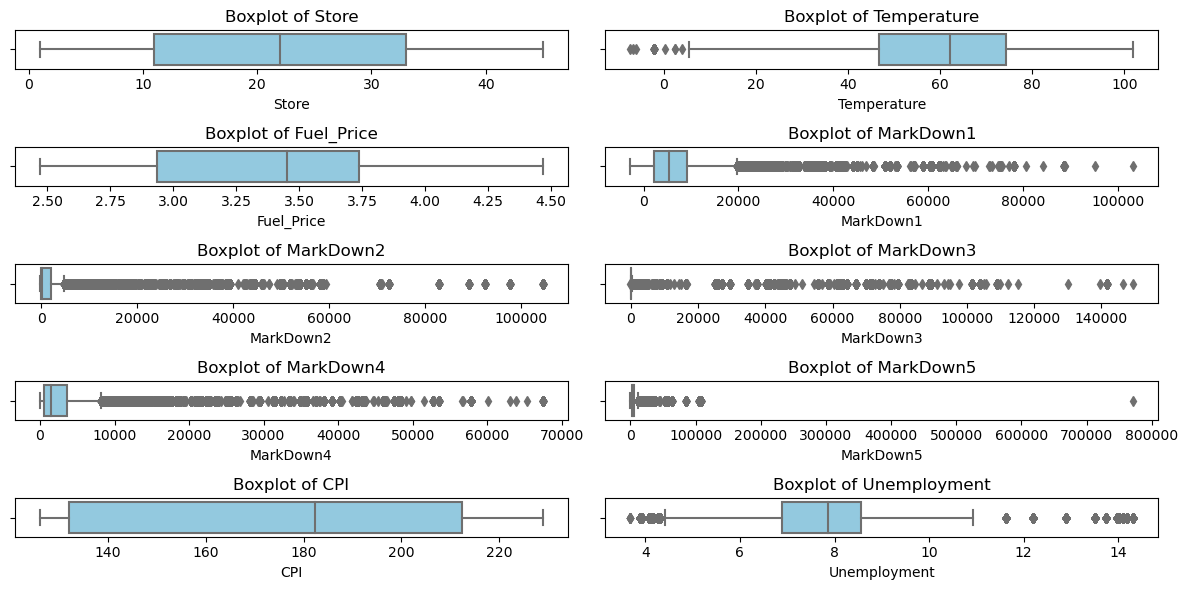

Persentase Outliers:
+--------------+-------------+-------------+
| Attribute    | Lower Bound | Upper Bound |
+--------------+-------------+-------------+
| Store        |    0.00%    |    0.00%    |
| Temperature  |    0.02%    |    0.00%    |
| Fuel_Price   |    0.00%    |    0.00%    |
| MarkDown1    |    0.00%    |    2.32%    |
| MarkDown2    |    0.00%    |    4.19%    |
| MarkDown3    |    0.00%    |    4.50%    |
| MarkDown4    |    0.00%    |    3.08%    |
| MarkDown5    |    0.00%    |    1.85%    |
| CPI          |    0.00%    |    0.00%    |
| Unemployment |    1.95%    |    5.65%    |
| Size         |    0.00%    |    0.00%    |
| Dept         |    0.00%    |    0.00%    |
| Weekly_Sales |    0.00%    |    8.39%    |
+--------------+-------------+-------------+


In [27]:
n_subplot = 2  # Mengatur jumlah plot dalam 1 baris
n_baris = len(numeric_features) // n_subplot + 1  # Menghitung jumlah baris

# Mendefinisikan jumlah gambar yang akan ditampilkan
num_images = n_baris // 10 + 1

# Mengatur ukuran gambar
plt.figure(figsize=(12, 6))

# Loop untuk menampilkan boxplot
for index, attributes in enumerate(numeric_features):
    if index < 10:  # Memastikan tidak ada subplot ke-11
        plt.subplot(5, 2, index + 1)
        sns.boxplot(x=data[attributes], color='skyblue', orient='v')
        plt.title(f'Boxplot of {attributes}')
        plt.ylabel('')

plt.tight_layout()
plt.show()


# Membuat list kosong untuk menyimpan hasil persentase outliers
results = []

# Menentukan threshold untuk mendefinisikan outliers
outlier_threshold = 1.5

# Inisiasi dictionary untuk menyimpan persentase outliers
outliers_percentage = {}

# Menghitung nilai IQR (Interquartile Range) dan outliers
for atribut in numeric_features:
    Q1 = data[atribut].quantile(0.25)
    Q3 = data[atribut].quantile(0.75)
    IQR = Q3 - Q1

    # Menghitung batas atas dan batas bawah
    lower_bound = Q1 - outlier_threshold * IQR
    upper_bound = Q3 + outlier_threshold * IQR

    # Mengidentifikasi outliers
    outliers_lower = data[data[atribut] < lower_bound]
    outliers_upper = data[data[atribut] > upper_bound]

    # Menghitung persentase lower bound outliers
    percentage_lower = len(outliers_lower) / len(data) * 100

    # Menghitung persentase upper bound outliers
    percentage_upper = len(outliers_upper) / len(data) * 100

    # Menambahkan hasil ke dalam list results
    results.append([atribut, f"{percentage_lower:.2f}%", f"{percentage_upper:.2f}%"])

# Membuat table menggunakan PrettyTable
table = PrettyTable(["Attribute", "Lower Bound", "Upper Bound"])

# Memasukkan data ke dalam tabel "Persentase Outliers"
for result in results:
    table.add_row(result)

# Mengatur penataan kolom
table.align["Attribute"] = "l"
table.align["Lower Bound"] = "c"
table.align["Upper Bound"] = "c"

# Print tabel
print("Persentase Outliers:")
print(table)


**Insight :**

1. **Store:** Tidak ada nilai outliers yang terdeteksi.
2. **Temperature:** Terdapat sejumlah kecil data yang dianggap sebagai outliers di Lower Bound sekitar 0.02%, namun tidak ada outliers di Upper Bound.
3. **Fuel_Price:** Tidak ada nilai outliers yang terdeteksi.
4. **MarkDown1-5:** Setiap variabel MarkDown menunjukkan adanya outliers, dengan persentase outliers tertinggi pada MarkDown3 sekitar 4.50% di Upper Bound dan yang terendah pada MarkDown1 sekitar 2.32% di Upper Bound.
5. **CPI:** Tidak ada nilai outliers yang terdeteksi.
6. **Unemployment:** Terdapat sekitar 1.95% data sebagai outliers di Lower Bound dan sekitar 5.65% data sebagai outliers di Upper Bound.
7. **Size:** Tidak ada nilai outliers yang terdeteksi.
8. **Dept:** Tidak ada nilai outliers yang terdeteksi.
9. **Weekly_Sales:** Menunjukkan sejumlah signifikan outliers dengan persentase 8.39% data di Upper Bound.

- Variabel MarkDown (MarkDown1 hingga MarkDown5), Unemployment, dan Weekly_Sales menunjukkan adanya proporsi yang signifikan dari data yang dianggap sebagai outliers, baik di batas atas maupun batas bawah.
- Terdapat variasi signifikan dalam keberadaan outliers di antara variabel-variabel tersebut. Hal ini menandakan perlunya penanganan, seperti penghapusan atau pemrosesan khusus untuk mengatasi outliers tersebut.

**4.7 Analisis Korelasi Features**

Pada bagian ini, analisis korelasi antar fitur dalam dataset akan dilakukan menggunakan matriks Phik, yang dipilih karena kemampuannya untuk menangani outliers dan khususnya keunggulannya dalam membandingkan korelasi antara fitur numerik dan kategorikal. Phik correlation memiliki beberapa kelebihan, di antaranya:

- **Kemampuan menangani data kategorikal dan numerik:** Phik correlation memungkinkan penggunaan bersama data kategorikal dan numerik dalam matriks korelasi. Hal ini sangat berguna dalam proyek ini yang memiliki campuran fitur kategorikal dan numerik, memungkinkan analisis yang komprehensif dari seluruh dataset.

- **Invariance terhadap permutasi dan pengurutan:** Phik correlation tidak terpengaruh oleh permutasi atau pengurutan nilai-nilai dalam fitur, sehingga hasil korelasi tetap konsisten tanpa memandang perubahan urutan data.

- **Kemampuan dalam menangani outliers:** Metode Phik correlation cenderung lebih tangguh terhadap adanya outliers jika dibandingkan dengan korelasi parametrik lainnya. Hal ini membuatnya cocok untuk digunakan dalam proyek yang memiliki outliers karena tetap memberikan gambaran yang relevan tentang hubungan antara fitur meskipun adanya nilai-nilai ekstrim dalam dataset.

In [28]:
data_.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday', 'Type', 'Size', 'Dept', 'Weekly_Sales'],
      dtype='object')

In [23]:
# Redefining list locations setelah dilakukan drop column timezone
attributes = ['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday', 'Type', 'Size', 'Dept', 'Weekly_Sales']


# Menentukan kolom interval untuk perhitungan matriks phik
interval_cols = ['Weekly_Sales']

# Menghitung matriks phik untuk korelasi variabel kategorikal dan numerikal
phik_overview = data_[attributes].phik_matrix(interval_cols=interval_cols)

# Fungsi untuk mengkategorikan korelasi
def categorize_correlation(phik_overview):
    if  phik_overview > 0.5:
        return 'High_Positive_Correlation'
    elif phik_overview > 0.1:
        return 'Moderate_Positive_Correlation'
    elif phik_overview > 0:
        return 'Low_Positive_Correlation'
    elif phik_overview < -0.5:
        return 'High_Negative_Correlation'
    elif phik_overview < -0.1:
        return 'Moderate_Negative_Correlation'
    else:
        return 'Low_Negative_Correlation'
    
# Dataframe untuk korelasi kategoris
correlation_df = phik_overview.applymap(categorize_correlation)
correlation_df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales
Store,High_Positive_Correlation,Moderate_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,Low_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,Moderate_Positive_Correlation,Moderate_Positive_Correlation
Date,Moderate_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,Moderate_Positive_Correlation,Moderate_Positive_Correlation,Low_Negative_Correlation,Moderate_Positive_Correlation
Temperature,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,Low_Negative_Correlation,Moderate_Positive_Correlation
Fuel_Price,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,Low_Negative_Correlation,Moderate_Positive_Correlation
MarkDown1,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,Low_Negative_Correlation,Moderate_Positive_Correlation
MarkDown2,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,Low_Negative_Correlation,Moderate_Positive_Correlation
MarkDown3,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,Low_Negative_Correlation,Moderate_Positive_Correlation
MarkDown4,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,Low_Negative_Correlation,Moderate_Positive_Correlation
MarkDown5,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,Low_Negative_Correlation,Moderate_Positi

In [ ]:
# Membuat heatmap dengan anotasi angka korelasi
plt.figure(figsize=(30, 15))
sns.heatmap(phik_overview, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

# Menampilkan heatmap
plt.show()

**Insight :**

Dari tabel korelasi yang disediakan, terlihat bahwa fitur :
- 'Dept' 
- 'Size'
- 'store'
- 'Date'
- 'Temperature'
- 'Fuel_Price'
- 'MarkDown 1-5'
- 'Unemployment'
- 'Type' 

Fitur-fitur berikut memiliki korelasi yang cukup untuk digunakan dalam proses pembuatan model prediksi weekly sales. Mereka  bisa menjadi bagian penting dalam proses pembuatan model prediksi untuk memperkirakan penjualan mingguan. Oleh karena itu, penting untuk melakukan eksplorasi lebih lanjut untuk melihat secara langsung pengaruh fitur-fitur tersebut terhadap penjualan mingguan yang dihasilkan.

In [30]:
significant_features=['Dept','Size','Store','Date','Temperature','Fuel_Price','Unemployment','Type', 'CPI']

In [31]:
markdown = ['MarkDown1','MarkDown2','MarkDown3', 'MarkDown4','MarkDown5']

**4.8 Analisis Pengaruh Significant Features terhadap Weekly_Sales**

Pada section ini, akan diamati pengaruh significant features pada dataset terhadap penjualan mingguan yang didapatkan

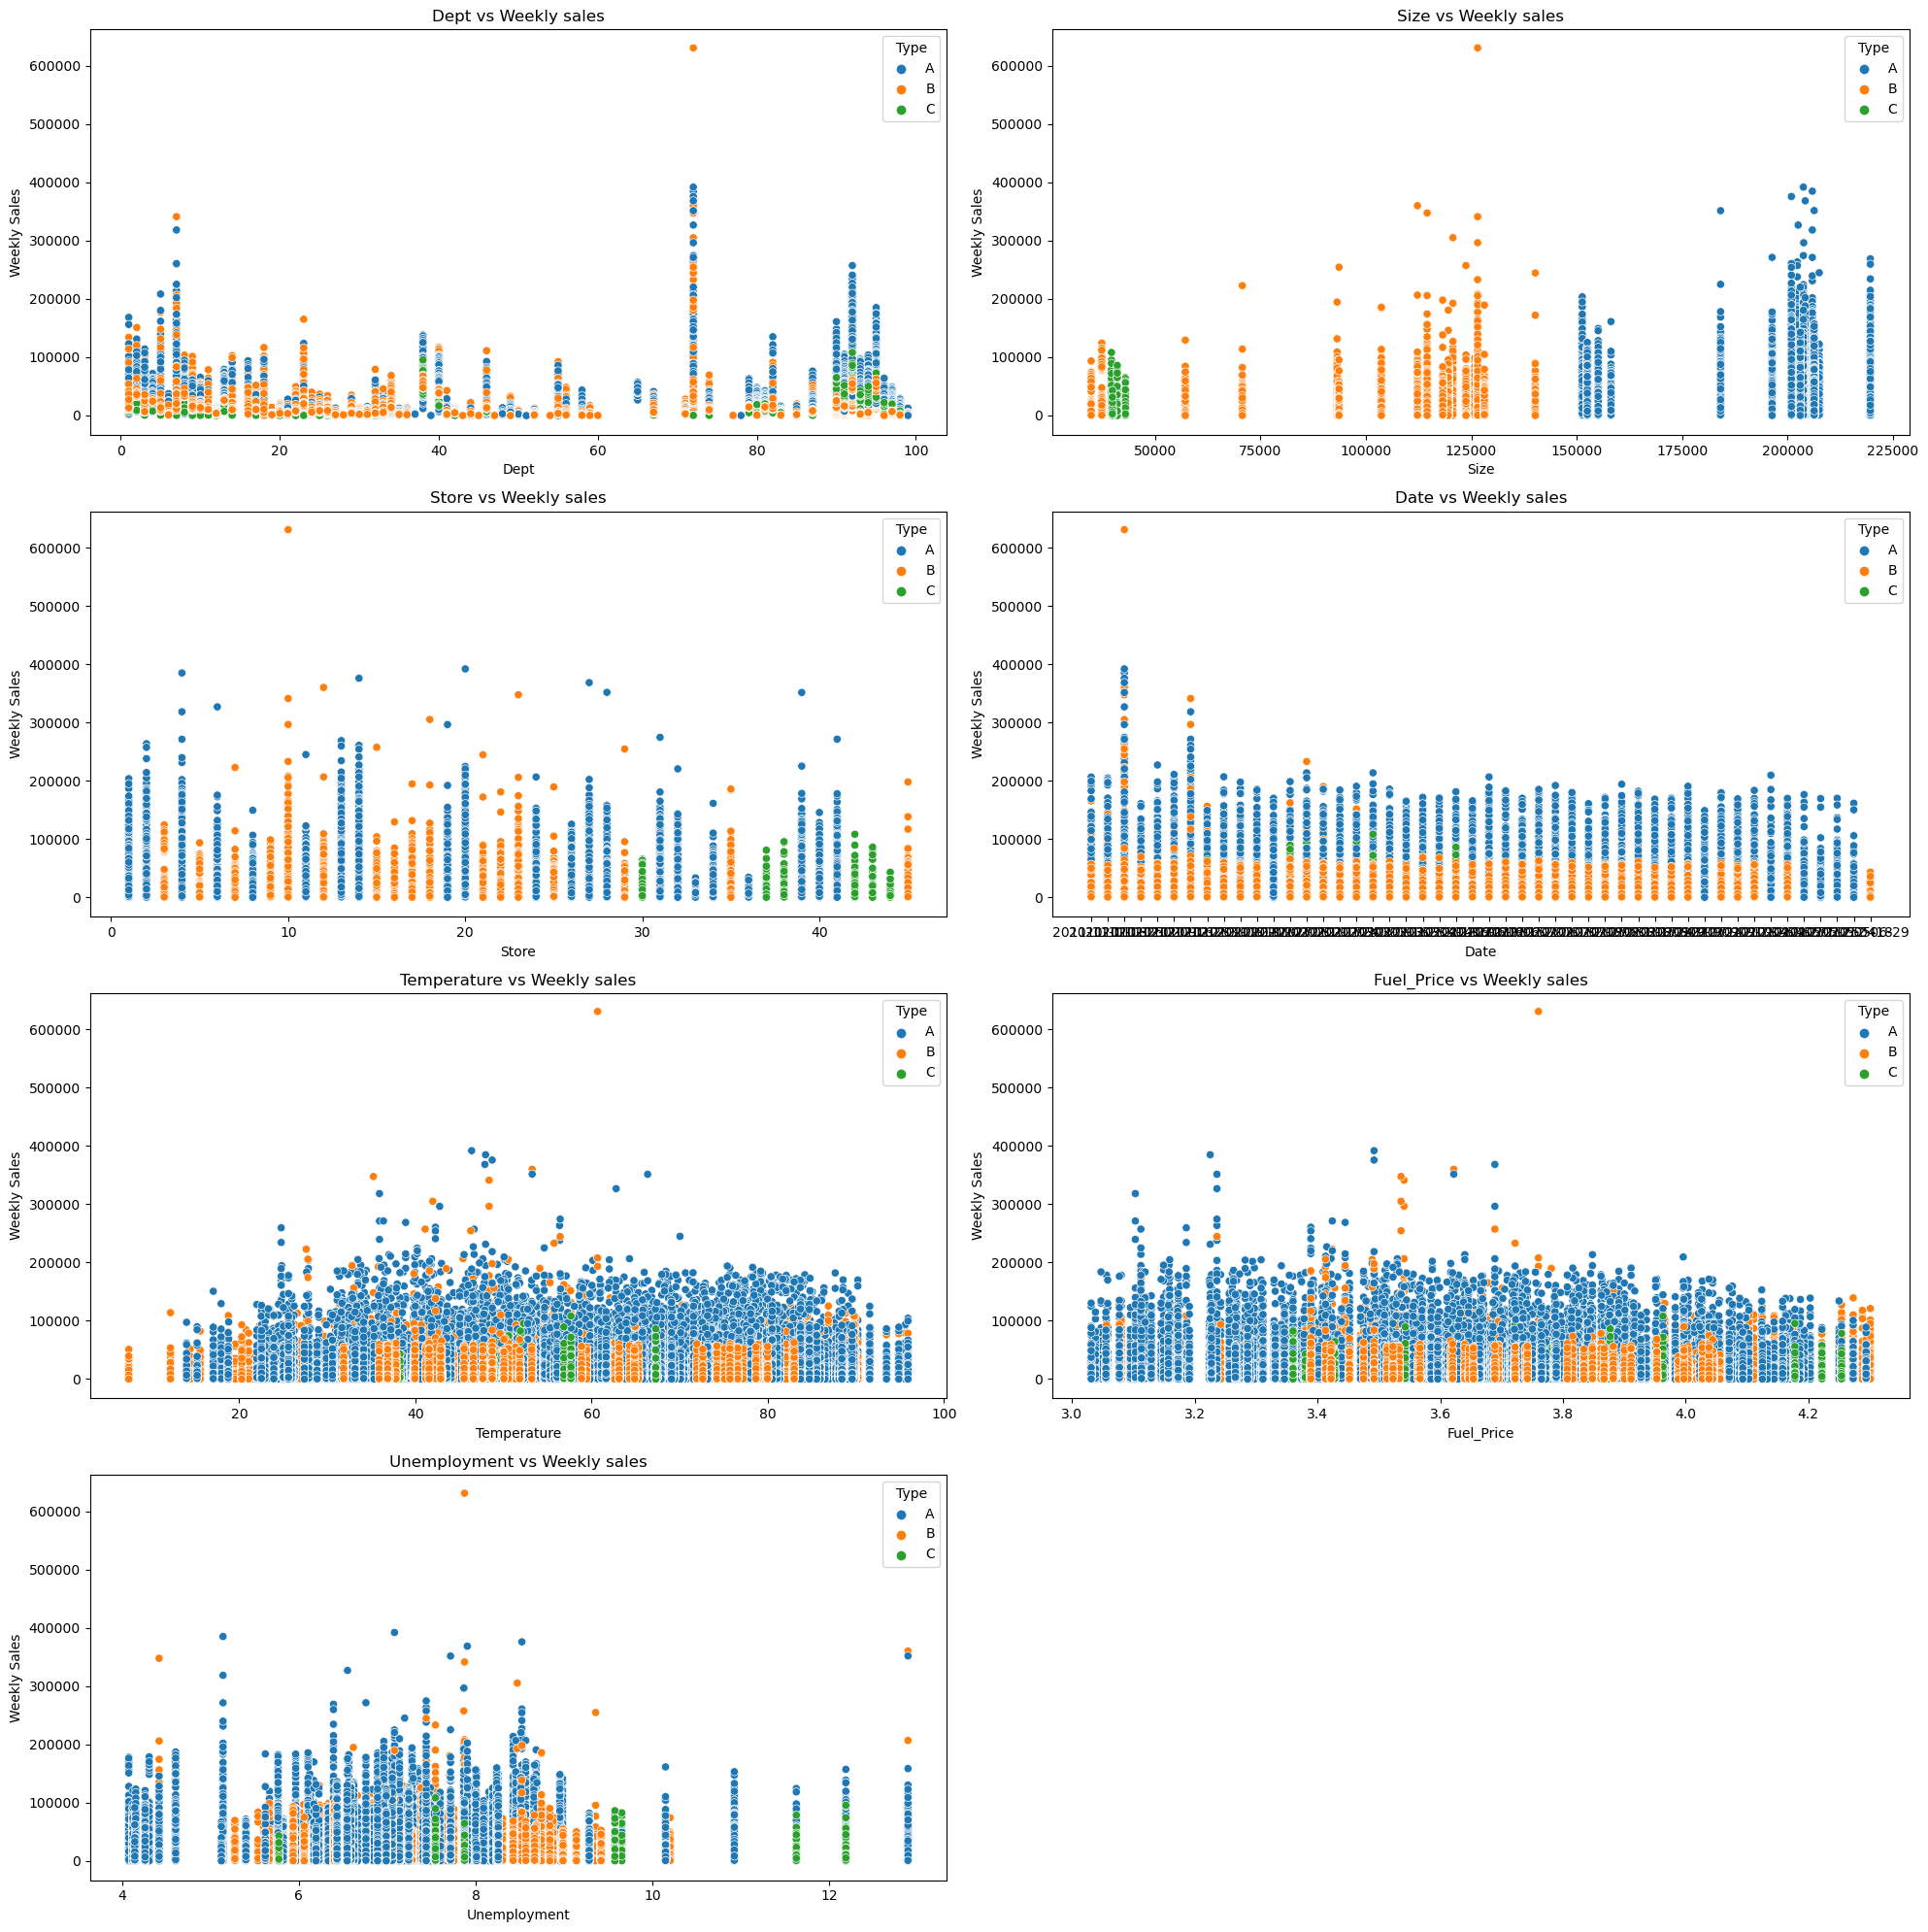

In [32]:
plt.figure(figsize=(20, 20))
for i in range(7):
    plt.subplot(4, 2, i + 1)
    sns.scatterplot(data=data_, x=significant_features[i], y='Weekly_Sales', hue='Type')
    plt.title(f'{significant_features[i]} vs Weekly sales')
    plt.xlabel(significant_features[i])
    plt.ylabel('Weekly Sales')

plt.tight_layout()
plt.show()


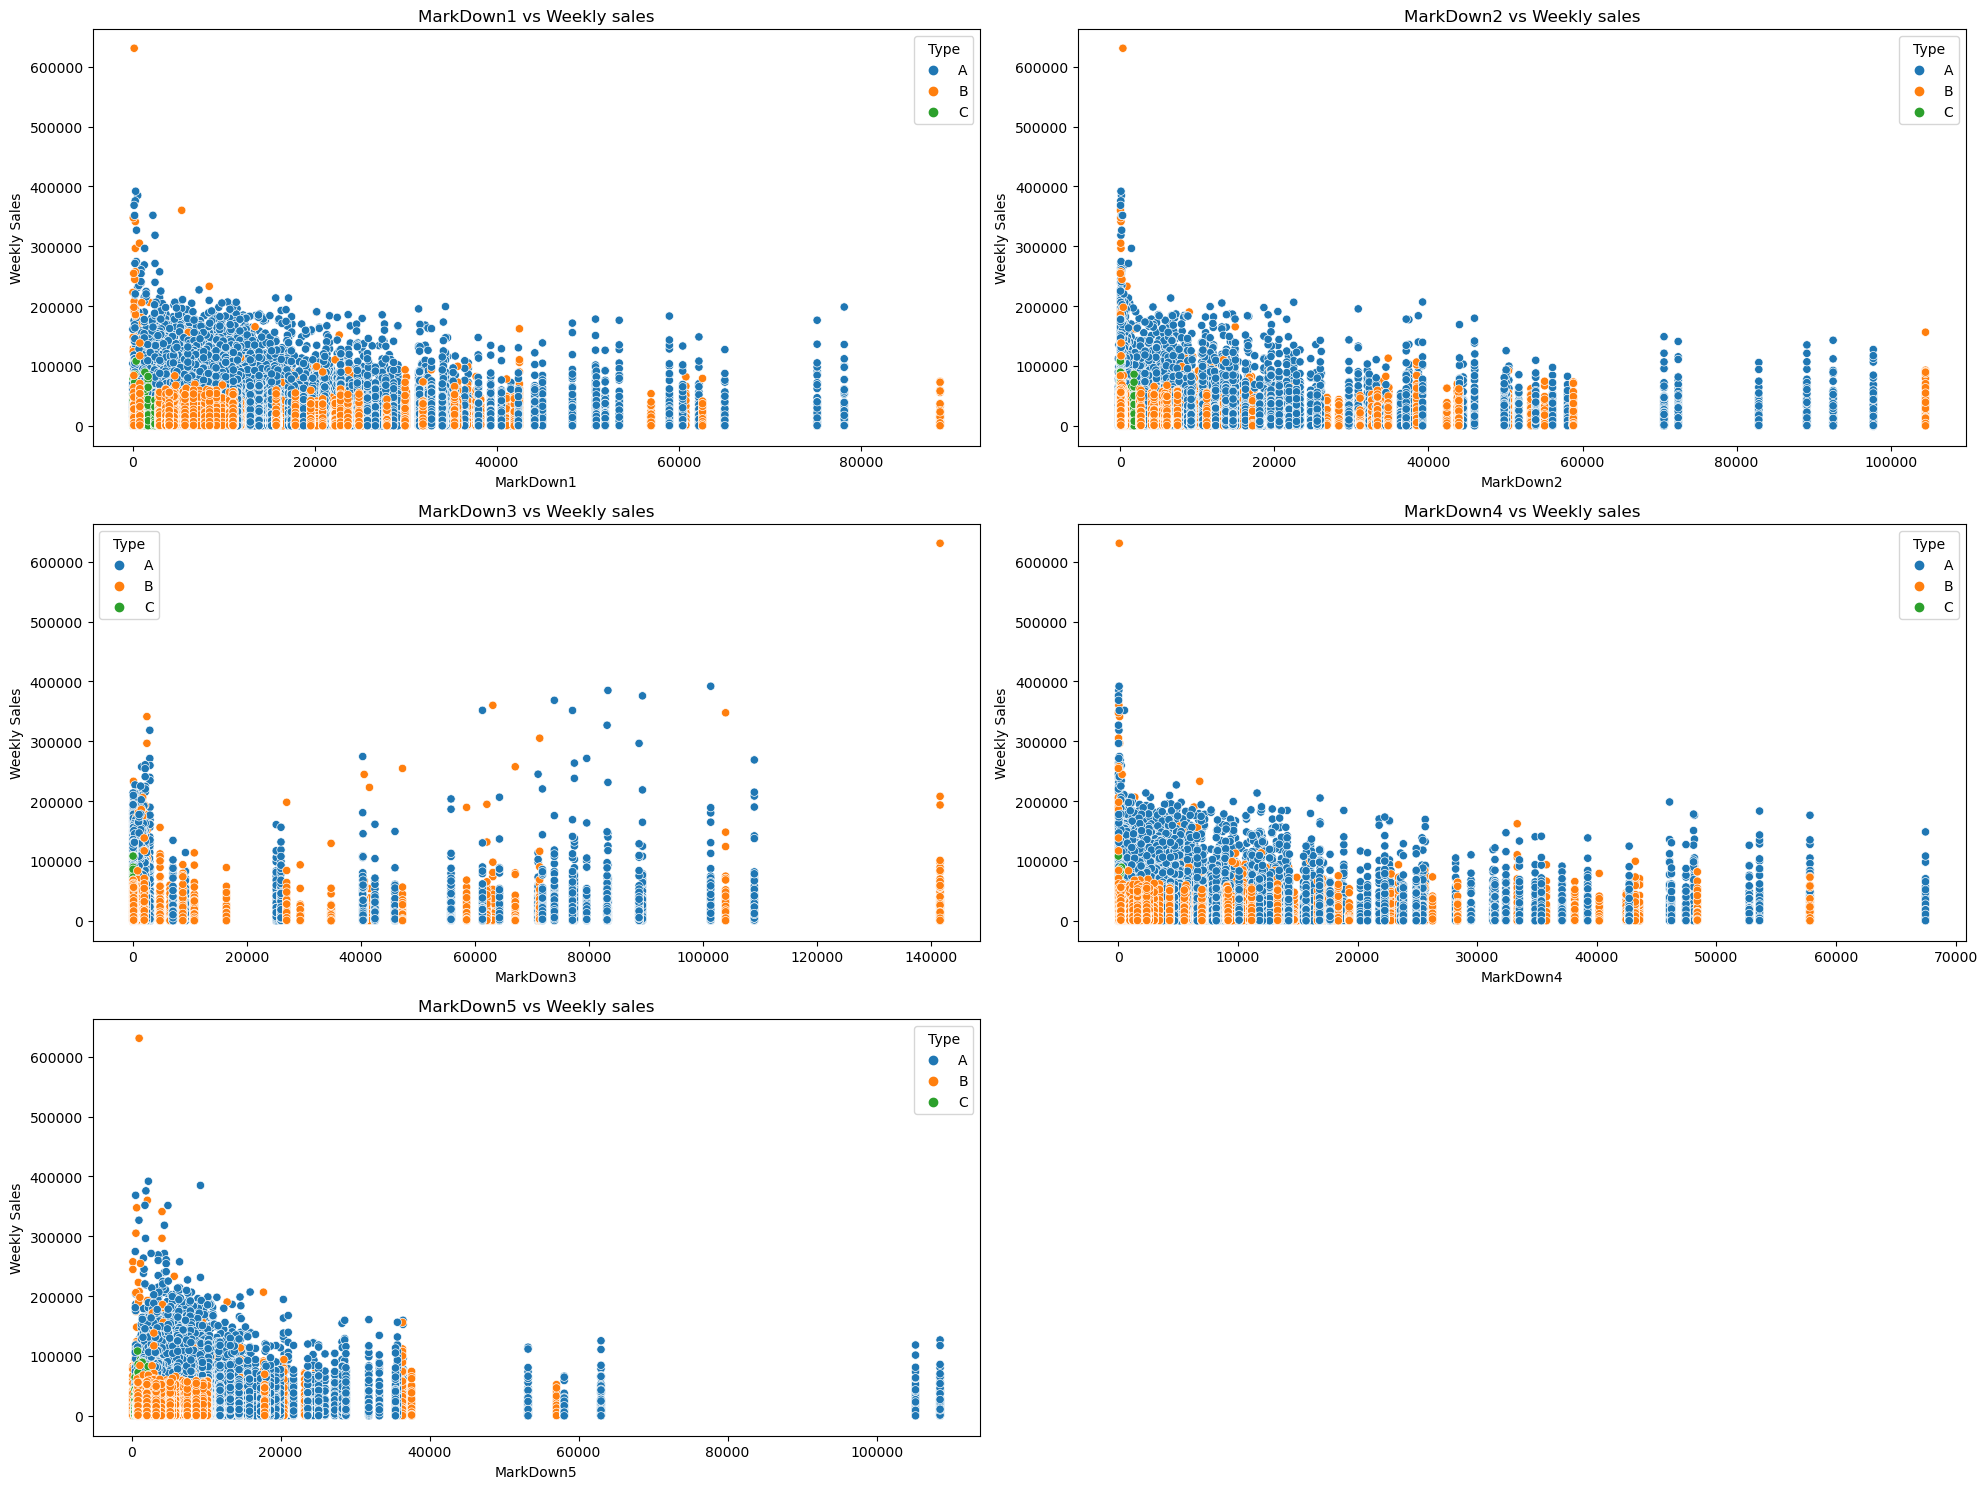

In [33]:
plt.figure(figsize=(20, 15))
for i in range(5):
    plt.subplot(3, 2, i + 1)
    sns.scatterplot(data=data_, x=markdown[i], y='Weekly_Sales', hue='Type')
    plt.title(f'{markdown[i]} vs Weekly sales')
    plt.xlabel(markdown[i])
    plt.ylabel('Weekly Sales')
plt.tight_layout()
plt.show()

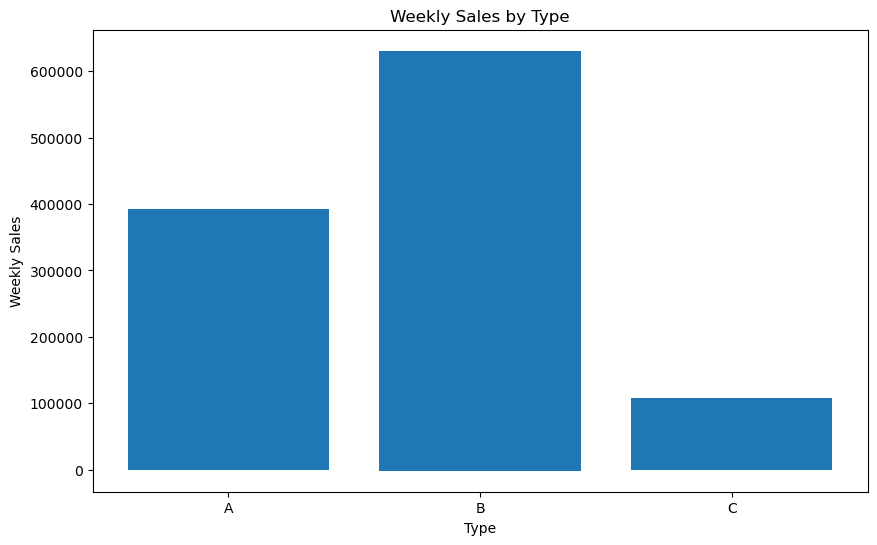

In [34]:
plt.figure(figsize=(10, 6))
plt.bar(data_['Type'], data_['Weekly_Sales'])
plt.xlabel('Type')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales by Type')
plt.show()

**Insight :**

Berikut adalah analisis pengaruh berbagai fitur terhadap 'Weekly_Sales' berdasarkan tabel korelasi yang diberikan:

1. Pengaruh Dept terhadap Weekly Sales 
    - **Pengaruh Dept terhadap Weekly Sales:** Korelasi antara 'Dept' dan 'Weekly_Sales' menunjukkan adanya hubungan positif yang cukup kuat (0.52) antara departemen dan penjualan mingguan. Dari plot dept vs weekly sales, kita dapat melihat bahwa secara umum, semakin besar nilai 'Dept', semakin tinggi juga penjualan mingguan yang terjadi. Namun, masih terdapat fluktuasi weekly sales di dalam perbandingan data pengaruh dept terhadap weekly sales

2. Pengaruh Size terhadap Weekly Sales
    - **Pengaruh Size terhadap Weekly Sales:** Korelasi antara 'Size' dan 'Weekly_Sales' menunjukkan hubungan positif antara ukuran toko dan penjualan mingguan. Dari plot size vs weekly sales, kita juga dapat melihat bahwa toko dengan ukuran lebih besar cenderung memiliki penjualan mingguan yang lebih tinggi.

3. Pengaruh Store terhadap Weekly Sales
    - **Pengaruh Store terhadap Weekly Sales:** Korelasi antara 'Store' dan 'Weekly_Sales' menunjukkan hubungan positif antara nomor toko dan penjualan mingguan. Dari plot store vs weekly size, kita juga dapat melihat bahwa korelasi antara kedua fitur ini bersifat positif, namun tidak terlalu kuat.

4. Pengaruh Date terhadap Weekly Sales
    - **Pengaruh Date terhadap Weekly Sales:** Korelasi antara 'Date' dan 'Weekly_Sales' relatif rendah menunjukkan bahwa tanggal tidak memiliki pengaruh linier yang terlalu signifikan terhadap penjualan mingguan.

5. Pengaruh Temperature terhadap Weekly Sales
    - **Pengaruh Temperature terhadap Weekly Sales:** Korelasi antara 'Temperature' dan 'Weekly_Sales' menunjukkan hubungan positif, meskipun tidak terlalu kuat, antara suhu dan penjualan mingguan.

6. Pengaruh Fuel Price terhadap Weekly Sales
    - **Pengaruh Fuel Price terhadap Weekly Sales**: Korelasi antara 'Fuel_Price' dan 'Weekly_Sales' menunjukkan hubungan positif yang lemah antara harga bahan bakar dan penjualan mingguan.

7. Pengaruh Markdown 1 terhadap Weekly Sales
    - **Pengaruh Markdown 1 terhadap Weekly Sales:** Korelasi antara 'Markdown1' dan 'Weekly_Sales' menunjukkan adanya hubungan korelasi yang kurang signifikan antara markdown pricing tipe 1 dan penjualan mingguan.

8. Pengaruh Markdown 2 terhadap Weekly Sales
    - **Pengaruh Markdown 2 terhadap Weekly Sales:** Korelasi antara 'Markdown1' dan 'Weekly_Sales' menunjukkan adanya hubungan korelasi yang kurang signifikan antara markdown pricing tipe 2 dan penjualan mingguan.

9. Pengaruh Markdown 3 terhadap Weekly Sales
    - **Pengaruh Markdown 3 terhadap Weekly Sales:** Korelasi antara 'Markdown3' dan 'Weekly_Sales' menunjukkan hubungan positif antara markdown pricing tipe 3 dan penjualan mingguan.

10. Pengaruh Markdown 4 terhadap Weekly Sales
    - **Pengaruh Markdown 4 terhadap Weekly Sales:** Korelasi antara 'Markdown1' dan 'Weekly_Sales' menunjukkan adanya hubungan korelasi yang kurang signifikan antara markdown pricing tipe 4 dan penjualan mingguan.

11. Pengaruh Markdown 5 terhadap Weekly Sales
    - **Pengaruh Markdown 5 terhadap Weekly Sales:** Menunjukkan hubungan invers yang cukup moderate antara markdown pricing tipe 5 dan penjualan mingguan.

12. Pengaruh Unemployment terhadap Weekly Sales
    - **Pengaruh Unemployment terhadap Weekly Sales:** Korelasi antara 'Unemployment' dan 'Weekly_Sales' adalah 0.176242, menunjukkan hubungan yang kurang signifikan antara tingkat pengangguran dan penjualan mingguan.

13. Pengaruh Type Store terhadap Weekly Sales
    - **Pengaruh Type terhadap Weekly Sales:** Korelasi antara 'Type' dan 'Weekly_Sales' menunjukkan adanya korelasi yang cukup signifikan dan dapat menentukan perbedaan weekly sales, dimana store type B memiliki rata-rata weekly sales tertinggi, disusul oleh type A dan type C, sebagai type store dengan weekly sales terendah

**Kesimpulan EDA**

Dalam proyek ini, beberapa insight yang berharga telah ditemukan terkait pengaruh berbagai fitur terhadap 'Weekly_Sales' pada suatu toko retail. Berikut adalah kesimpulan dari insight-insight tersebut:

1. **Pengaruh Fitur-Fitur pada Penjualan Mingguan:**
   - **Dept (Departemen):** Terdapat hubungan positif yang cukup kuat antara departemen dan penjualan mingguan. Semakin besar nilai 'Dept', semakin tinggi pula penjualan mingguan yang terjadi.
   - **Size (Ukuran Toko):** Terdapat hubungan positif antara ukuran toko dan penjualan mingguan. Toko dengan ukuran yang lebih besar cenderung memiliki penjualan mingguan yang lebih tinggi.
   - **Store (Nomor Toko):** Korelasi positif antara nomor toko dan penjualan mingguan, meskipun tidak terlalu kuat.
   - **Type (Tipe Toko):** Menunjukkan perbedaan yang signifikan dalam weekly sales antara tipe toko. Store type B memiliki rata-rata weekly sales tertinggi dibandingkan dengan type A dan C.

2. **Pengaruh Variabel Non-Toko pada Penjualan Mingguan:**
   - **Date (Tanggal):** Tidak menunjukkan korelasi yang signifikan dengan penjualan mingguan.
   - **Temperature (Suhu):** Korelasi positif yang lemah dengan penjualan mingguan.
   - **Fuel_Price (Harga Bahan Bakar):** Korelasi positif yang lemah dengan penjualan mingguan.
   - **Markdowns (Penurunan Harga):** Varian dalam dampak tiap jenis markdown pada penjualan mingguan, dari tidak signifikan hingga hubungan positif yang moderat (Markdown 3).

3. **Variabel Ekonomi:**
   - **CPI (Consumer Price Index) & Unemployment (Tingkat Pengangguran):** Korelasi yang kurang signifikan dengan penjualan mingguan.

4. **Kesimpulan Umum:**
   - Faktor internal seperti departemen, ukuran, tipe toko, dan jenis markdown memiliki pengaruh yang cukup signifikan terhadap penjualan mingguan.
   - Faktor eksternal seperti suhu, harga bahan bakar, CPI, dan tingkat pengangguran memiliki pengaruh yang kurang signifikan terhadap penjualan mingguan.

Kesimpulan utamanya adalah bahwa faktor-faktor internal seperti departemen, ukuran, dan jenis toko memainkan peran yang penting dalam menentukan penjualan mingguan. Analisis lebih lanjut dapat dilakukan untuk memahami dengan lebih baik pengaruh setiap fitur terhadap penjualan mingguan dan membantu dalam pengambilan keputusan bisnis yang lebih baik di masa depan.

**Preprocessing Plan**

- Perlunya dilakukan Feature Selection untuk memastikan kemampuan forecasting model lebih optimal dengan menggunakan features yang memiliki korelasi signifikan terhadap weekly sales.
- Perlunya dilakukan features scaling dan label encoding (untuk fitur 'Type')
- Perlunya dilakukan outliers handling.

### Time Series Analysis: Weekly_Sales

<Axes: xlabel='Date'>

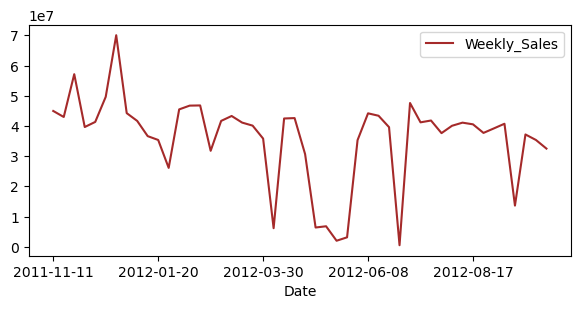

In [53]:
sales=data_.groupby("Date")[["Weekly_Sales"]].sum()
sales.plot(color='brown',figsize=(7,3))

Insight:..........

Sebelum memasuki tahap Feature Engineering, kita perlu memperhatikan dua kolom dalam dataframe `data_`: `Date` dan `Dept`. Hal ini disebabkan oleh ketidaksesuaian tipe data pada kedua kolom tersebut. Kolom `Date` mungkin saat ini berupa string atau tipe data lain yang tidak dapat dianggap sebagai data waktu, dan kolom `Dept` mungkin tidak berupa tipe data integer.

Untuk menangani hal ini, langkah pertama adalah mengonversi kolom `Date` menjadi tipe data datetime menggunakan fungsi seperti `pd.to_datetime`. Kemudian, kolom `Dept` perlu diubah tipe datanya menjadi integer menggunakan metode astype di Pandas.

Dengan melakukan penyesuaian tipe data ini, kita memastikan bahwa data waktu di kolom `Date` diinterpretasikan dengan benar, dan kolom `Dept` memiliki tipe data integer yang sesuai. Langkah ini perlu dilakukan sebelum melanjutkan ke tahap selanjutnya dalam proses analisis data atau Feature Engineering.

In [35]:
# Mengubah tipe data kolom "Date" menjadi datetime
data_['Date'] = pd.to_datetime(data_['Date'])
data_.set_index(keys = "Date", inplace = True)

# Mengubah tipe data kolom "Dept" menjadi integer
data_['Dept'] = data_['Dept'].astype(int)

data_.head()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales
Date,,,,,,,,,,,,,,,
2011-11-11,1,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,A,151315,1,18689.54
2011-11-11,1,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,A,151315,2,44936.47
2011-11-11,1,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,A,151315,3,9959.64
2011-11-11,1,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,A,151315,4,36826.52
2011-11-11,1,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,A,151315,5,31002.65


---

# V. Feature Engineering
> Pada tahap Feature Engineering ini, akan dilakukan dua proses utama, yaitu _Feature Selection_ dan _Feature Transformation_, dengan tujuan untuk meningkatkan kualitas model regresi yang akan dibangun.

## V.1. Splitting Features dan Target
> Tahap ini memuat proses pemisahan antara fitur (features) dengan target. Dalam konteks dataset ini, fitur merujuk pada seluruh kolom data kecuali kolom `Weekly_Sales`. Hal ini dikarenakan kolom `Weekly_Sales` menjadi target dari analisis ini.

In [36]:
X = data_.drop(['Weekly_Sales'], axis = 1)    # Features (X) terdiri tadi seluruh kolom, kecuali kolom 'Weekly_Sales'
y = data_['Weekly_Sales']                     # Target (y) pada project ini adalah 'Weekly_Sales'

## V.2. Feature Selection
> Pada tahap Feature Selection, akan dilakukan seleksi terhadap fitur atau variabel yang akan dimasukkan ke dalam model. Tujuajn utamanya adalah untuk memilih fitur-fitur yang paling relevan dan signifikan dalam memprediksi target (dalam hal ini, `Weekly_Sales`). Proses ini dapat dilakukan dengan berbagai cara, termasuk dengan personal judgement, domain dan business knowledge, korelasi antar fitur, serta VIF (Variance Inflation Factor) khususnya untuk model regresi linear.

### V.2.1. Berdasarkan Korelasi
> Pada langkah ini, akan dilakukan seleksi fitur berdasarkan nilai korelasi dengan target (Weekly_Sales). Fitur-fitur yang tidak memiliki korelasi dengan target tidak akan digunakan dalam melakukan pemodelan. Dalam konteks ini, fitur `CPI` dan `IsHoliday` akan dihapus karena korelasinya dinilai rendah berdasarkan _correlation matrix_ pada tahap Exploratory Data Analysis (EDA) sebelumnya.

In [37]:
X = X.drop(['IsHoliday'], axis=1)
print(f"Dimensi features (X):", X.shape)

Dimensi features (X): (97056, 13)


### V.2.2. Berdasarkan Nilai VIF
> Pada langkah ini, akan dihitung nilai Variance Inflation Factor (VIF) untuk mengevaluasi asumsi multikolinearitas dalam pemodelan regresi linear. Asumsi ini penting untuk memastikan bahwa tidak ada hubungan linear yang signifikan antara dua atau lebih fitur dalam model. Selain itu, perhitungan nilai VIF juga dapat digunakan sebagai salah satu kriteria dalam kebutuhan feature selection.

In [38]:
X.head()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Dept
Date,,,,,,,,,,,,,
2011-11-11,1,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,A,151315,1
2011-11-11,1,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,A,151315,2
2011-11-11,1,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,A,151315,3
2011-11-11,1,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,A,151315,4
2011-11-11,1,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,A,151315,5


In [39]:
XNum = X[['Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Size']]

In [40]:
# membuat function untuk menghitung nilai VIF
def calc_vif(XNum):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = XNum.columns
    vif["VIF"] = [variance_inflation_factor(XNum.values, i) for i in range(XNum.shape[1])]

    return(vif)

calc_vif(XNum)

,variables,VIF
0,Temperature,14.084919
1,Fuel_Price,53.294812
2,MarkDown1,6.473928
3,MarkDown2,1.299228
4,MarkDown3,1.069769
5,MarkDown4,4.325354
6,MarkDown5,1.783169
7,CPI,17.174105
8,Unemployment,22.324618
9,Size,11.167330


## V.3. Splitting Data Train dan Data Test
> Pada tahap ini, akan dilakukan pembagian dataset menjadi dua bagian utama: data train dan data test. Tujuan dari pemisahan ini adalah untuk melatih model menggunakan data train dan kemudian menguji kinerjanya pada data test.

In [41]:
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size = 0.3, random_state = 10)
print('Size X Train', XTrain.shape)
print('Size X Test', XTest.shape)

Size X Train (67939, 13)
Size X Test (29117, 13)


## V.4. Cardinality Analysis
> Analisis cardinality dilakukan untuk mengevaluasi seberapa banyak nilai unik yang terdapat dalam setiap kolom yang bersifat kategorikal pada dataset. Cardinality mengukur keragaman atau variasi nilai yang dimiliki oleh suatu kolom. Kolom dengan cardinality rendah memiliki jumlah nilai unik yang terbatas, sementara kolom dengan cardinality tinggi memiliki banyak nilai unik atau label.

> - **Cardinality Rendah**: Kolom dengan cardinality rendah sering kali tidak memerlukan perlakuan khusus. Model-machine learning umumnya dapat menangani dengan baik fitur-fitur ini tanpa perubahan tambahan.

> - **Cardinality Tinggi**: Kolom dengan cardinality tinggi dapat memerlukan perhatian khusus. Strategi umum melibatkan pengelompokan nilai atau penggunaan teknik-teknik seperti embedding untuk mengatasi kompleksitas yang dapat ditimbulkan oleh jumlah nilai unik yang besar.

In [42]:
print('Banyaknya label pada fitur Store       : {}'.format(XTrain['Store'].nunique()))
print('Banyaknya label pada fitur Type        : {}'.format(XTrain['Type'].nunique()))
print('Banyaknya label pada fitur Dept        : {}'.format(XTrain['Dept'].nunique()))
print('Banyaknya entries pada data            : {}'.format(len(XTrain)))

Banyaknya label pada fitur Store       : 45
Banyaknya label pada fitur Type        : 3
Banyaknya label pada fitur Dept        : 81
Banyaknya entries pada data            : 67939


## V.5. Feature Transformation

In [43]:
X.head()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Dept
Date,,,,,,,,,,,,,
2011-11-11,1,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,A,151315,1
2011-11-11,1,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,A,151315,2
2011-11-11,1,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,A,151315,3
2011-11-11,1,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,A,151315,4
2011-11-11,1,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,A,151315,5


In [54]:
# Kolom numerik dengan outliers pada lower bound
numCol1 = ['Temperature']
num1_pipeline = make_pipeline(Winsorizer(capping_method='iqr', tail='left', fold=1.5),    #outlier handling pada feature numerik dengan Winsorizer
                             RobustScaler())                                              #scaling feature numerik dengan RobustScaler()

# Kolom numerik dengan outliers pada upper bound
numCol2 = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
num2_pipeline = make_pipeline(Winsorizer(capping_method='iqr', tail='right', fold=3),     #outlier handling pada feature numerik dengan Winsorizer
                             RobustScaler())                                              #scaling feature numerik dengan RobustScaler()

# Kolom numerik dengan outliers pada lower dan upper bound
numCol3 = ['Unemployment']
num3_pipeline = make_pipeline(Winsorizer(capping_method='iqr', tail='both', fold=3),      #outlier handling pada feature numerik dengan Winsorizer
                             RobustScaler())                                              #scaling feature numerik dengan RobustScaler()

# Kolom numerik tanpa outlier
numCol4 = ['Fuel_Price', 'CPI', 'Size']
num4_pipeline = make_pipeline(MinMaxScaler())                                             #scaling feature numerik dengan MinMaxScaler()

# Kolom berskala nominal
nomCol = ['Store', 'Type', 'Dept']
nom_pipeline = make_pipeline(OneHotEncoder())                                             #encoding feature nominal dengan OneHotEncoder()


prep = ColumnTransformer([
    ('numerik: Temperature', num1_pipeline, numCol1),
    ('numerik: MarkDown', num2_pipeline, numCol2),
    ('numerik: Unemployment', num3_pipeline, numCol3),
    ('numerik: Fuel_Price, CPI, Size', num4_pipeline, numCol4),
    ('nominal', nom_pipeline, nomCol)])
prep

ColumnTransformer(transformers=[('numerik: Temperature',
                                 Pipeline(steps=[('winsorizer',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             tail='left')),
                                                 ('robustscaler',
                                                  RobustScaler())]),
                                 ['Temperature']),
                                ('numerik: MarkDown',
                                 Pipeline(steps=[('winsorizer',
                                                  Winsorizer(capping_method='iqr')),
                                                 ('robustscaler',
                                                  RobustScaler())]),
                                 ['MarkDown1', 'MarkDown2', 'MarkDown3',
                                  'Mar...
                                ('numerik: Unemployment',
                                 Pipeline(steps=[('winsorizer',
                                                  Winsorizer(capping_method='iqr',
                                                             tail='both')),
                                                 ('robustscaler',
                                                  RobustScaler())]),
                                 ['Unemployment']),
                                ('numerik: Fuel_Price, CPI, Size',
                                 Pipeline(steps=[('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['Fuel_Price', 'CPI', 'Size']),
                                ('nominal',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['Store', 'Type', 'Dept'])])

---

# VI. Model Definition
> Pada tahap ini akan dibuat beberapa model dasar (baseline) menggunakan beberapa algoritma machine learning, yaitu Linear Regression, K-Nearest Neighbors (KNN), Support Vector Machine (SVM), Decision Tree, Random Forest, dan AdaBoosting. Tujuan dari langkah ini adalah untuk menguji performa awal dari berbagai algoritma di antara yang telah dipilih, dengan harapan dapat mengidentifikasi algoritma yang memiliki kinerja yang baik untuk prediksi `Weekly_Sales`.

In [55]:
# KNN
knn = make_pipeline(prep, KNeighborsRegressor())

# SVM
svm = make_pipeline(prep, SVR())

# Decision Tree
dt = make_pipeline(prep, DecisionTreeRegressor(random_state=10))

# Random Forest
rf = make_pipeline(prep, RandomForestRegressor(random_state=10))

# AdaBoosting
ab = make_pipeline(prep, AdaBoostRegressor(random_state=10))

---

# VII. Model Tarining

In [56]:
# KNN
knn.fit(XTrain, yTrain)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerik: Temperature',
                                                  Pipeline(steps=[('winsorizer',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='left')),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['Temperature']),
                                                 ('numerik: MarkDown',
                                                  Pipeline(steps=[('winsorizer',
                                                                   Winsorizer(capping_method='iqr')),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['Ma...
                                                  Pipeline(steps=[('winsorizer',
                                                                   Winsorizer(capping_method='iqr',
                                                                              tail='both')),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['Unemployment']),
                                                 ('numerik: Fuel_Price, CPI, '
                                                  'Size',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['Fuel_Price', 'CPI',
                                                   'Size']),
                                                 ('nominal',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['Store', 'Type', 'Dept'])])),
                ('kneighborsregressor', KNeighborsRegressor())])

In [57]:
# SVM
svm.fit(XTrain, yTrain)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerik: Temperature',
                                                  Pipeline(steps=[('winsorizer',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='left')),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['Temperature']),
                                                 ('numerik: MarkDown',
                                                  Pipeline(steps=[('winsorizer',
                                                                   Winsorizer(capping_method='iqr')),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['Ma...
                                                 ('numerik: Unemployment',
                                                  Pipeline(steps=[('winsorizer',
                                                                   Winsorizer(capping_method='iqr',
                                                                              tail='both')),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['Unemployment']),
                                                 ('numerik: Fuel_Price, CPI, '
                                                  'Size',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['Fuel_Price', 'CPI',
                                                   'Size']),
                                                 ('nominal',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['Store', 'Type', 'Dept'])])),
                ('svr', SVR())])

In [58]:
# Decision Tree
dt.fit(XTrain, yTrain)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerik: Temperature',
                                                  Pipeline(steps=[('winsorizer',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='left')),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['Temperature']),
                                                 ('numerik: MarkDown',
                                                  Pipeline(steps=[('winsorizer',
                                                                   Winsorizer(capping_method='iqr')),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['Ma...
                                                                   Winsorizer(capping_method='iqr',
                                                                              tail='both')),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['Unemployment']),
                                                 ('numerik: Fuel_Price, CPI, '
                                                  'Size',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['Fuel_Price', 'CPI',
                                                   'Size']),
                                                 ('nominal',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['Store', 'Type', 'Dept'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=10))])

In [62]:
# Random Forest
rf.fit(XTrain, yTrain)

KeyboardInterrupt: 

In [60]:
# AdaBoosting
ab.fit(XTrain, yTrain)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerik: Temperature',
                                                  Pipeline(steps=[('winsorizer',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='left')),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['Temperature']),
                                                 ('numerik: MarkDown',
                                                  Pipeline(steps=[('winsorizer',
                                                                   Winsorizer(capping_method='iqr')),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['Ma...
                                                                   Winsorizer(capping_method='iqr',
                                                                              tail='both')),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['Unemployment']),
                                                 ('numerik: Fuel_Price, CPI, '
                                                  'Size',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['Fuel_Price', 'CPI',
                                                   'Size']),
                                                 ('nominal',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['Store', 'Type', 'Dept'])])),
                ('adaboostregressor', AdaBoostRegressor(random_state=10))])

---

# VIII. Model Evaluation

In [64]:
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold

skfold = KFold(n_splits=5, shuffle=True, random_state=42)
# Define regression-specific scoring functions
custom_mse_scorer = make_scorer(mean_squared_error)
custom_r2_scorer = make_scorer(r2_score)

# Checking cross-validation score
cv_knn_model = cross_val_score(knn, XTrain, yTrain, cv=skfold, scoring=custom_mse_scorer)
cv_svm_model = cross_val_score(svm, XTrain, yTrain, cv=skfold, scoring=custom_mse_scorer)
cv_dt_model = cross_val_score(dt, XTrain, yTrain, cv=skfold, scoring=custom_mse_scorer)
# cv_rf_model = cross_val_score(rf, XTrain, yTrain, cv=skfold, scoring=custom_mse_scorer)
cv_ab_model = cross_val_score(ab, XTrain, yTrain, cv=skfold, scoring=custom_mse_scorer)

name_model = []
cv_scores = 0

for cv, name in zip(
    [cv_knn_model, cv_svm_model, cv_dt_model, cv_ab_model],
    ["knn", "svm", "dt", "rf", "ab"],
):
    print(name)
    print("MSE - All - Cross Validation  : ", cv)
    print("MSE - Mean - Cross Validation : ", cv.mean())
    print("MSE - Std - Cross Validation  : ", cv.std())
    print("MSE - Range of Test-Set       : ", (cv.mean() - cv.std()), "-", (cv.mean() + cv.std()))
    print("-" * 50)

    if cv.mean() > cv_scores:
        cv_scores = cv.mean()
        name_model = name
    else:
        pass

print("Best model:", name_model)
print("Cross-val mean MSE:", cv_scores)

# R-squared scores
cv_r2_knn_model = cross_val_score(knn, XTrain, yTrain, cv=skfold, scoring=custom_r2_scorer)
cv_r2_svm_model = cross_val_score(svm, XTrain, yTrain, cv=skfold, scoring=custom_r2_scorer)
cv_r2_dt_model = cross_val_score(dt, XTrain, yTrain, cv=skfold, scoring=custom_r2_scorer)
# cv_r2_rf_model = cross_val_score(rf, XTrain, yTrain, cv=skfold, scoring=custom_r2_scorer)
cv_r2_ab_model = cross_val_score(ab, XTrain, yTrain, cv=skfold, scoring=custom_r2_scorer)

name_r2_model = []
cv_r2_scores = 0

for cv_r2, name in zip(
    [cv_r2_knn_model, cv_r2_svm_model, cv_r2_dt_model, cv_r2_ab_model],
    ["knn", "svm", "dt", "rf", "ab"],
):
    print(name)
    print("R2 - All - Cross Validation  : ", cv_r2)
    print("R2 - Mean - Cross Validation : ", cv_r2.mean())
    print("R2 - Std - Cross Validation  : ", cv_r2.std())
    print("R2 - Range of Test-Set       : ", (cv_r2.mean() - cv_r2.std()), "-", (cv_r2.mean() + cv_r2.std()))
    print("-" * 50)

    if cv_r2.mean() > cv_r2_scores:
        cv_r2_scores = cv_r2.mean()
        name_r2_model = name
    else:
        pass

print("Best model based on R2:", name_r2_model)
print("Cross-val mean R2:", cv_r2_scores)

  File "c:\Users\Nadia Nabilla\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(
